# Optimising deep learning models
Model optimization for mobile & edge devices refers to the process of decreasing its complexity at the cost of some accuracy. Optimizing a model to reduce its complexity comes with numerous advantages, including the following:
1. Reducing its size
2. Decreasing latency
3. Edge device compatibility

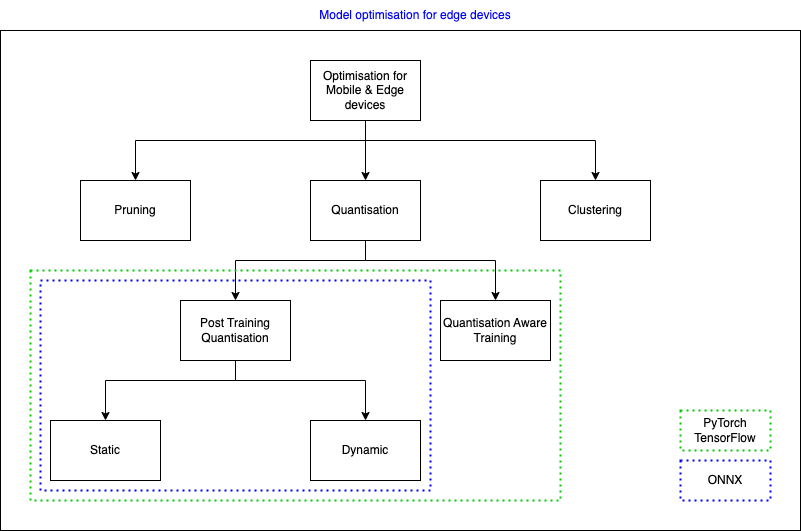

## Optimisation types
1. Pruning
2. Clustering
3. Quantisation

## Pruning
The process of pruning involves the elimination of parameters in a model that have a minimal effect on its predictions.

## Clustering
Clustering is a technique that involves organizing the weights of a model's layers into a fixed number of clusters, followed by the sharing of centroid values across the weights belonging to each of the individual clusters. As a result, the model's complexity is reduced since the number of unique weight values in the model is reduced.

# Quantisation
Quantization is a technique that involves decreasing the precision of the numerical values used to represent a model's parameters, which are typically 32-bit floating point numbers by default.

## Types of Quantisation
1. Post Training Quantisation
2. Quantisation Aware Training

## Post Training Quantisation
The process of decreasing the precision of a trained float model's parameters to a lighter version of the model is known as post-training quantisation.
1. Static Quantisation
2. Dynamic Quantisation

### Static Quantisation (Post Training)
To calculate the quantisation parameters, such as scale and zero point, a representative dataset is utilized on a trained floating-point model to determine the minimum and maximum values of weights and activations. These parameters are then applied to mitigate the potential loss resulting from quantisation.

### Dynamic Quantisation (Post Training)
In dynamic quantisation, the weights are quantised statically ahead of time after training and the activations are quantised dynamically during inference.

The primary distinction between dynamic and static quantization lies in the method used to determine the scale and zero point of activations. In static quantization, these values are computed offline in advance, typically using a calibration dataset, and remain constant during every forward pass. Conversely, in dynamic quantization, the values are calculated on-the-fly during each forward pass, which results in more precise values but introduces additional computational overhead.

## Quantisation Aware Training
Quantization-aware training (QAT) involves incorporating simulated quantization into the training process of a neural network. This allows the network to learn optimal quantization parameters, in addition to its weights, using the training data. By simulating the effects of quantization during training, QAT can improve the accuracy and efficiency of the quantized model during inference. During QAT, floating-point arithmetic is used for forward and backward passes, while the quantization process is applied as a simulation.

## Quantisation parameters
### Scale
The scaling factor, known as the "scale," is used to convert floating-point numbers to an integer representation by mapping the range of values that can be represented by a given number of bits in the integer representation.
Example: A tensor containing float number ranging from -1.0 to 1.0 can be quantised with a scale factor of 0.1, which means that each integer in the 8-bit integer representation represents a range of 0.1 in the original floating-point range. Applying this scale factor, the mapping of floating-point values to integers would be as follows:

-1.0 -> 0  <br>
-0.5 -> 5  <br>
 0.0 -> 10 <br>
 0.5 -> 15 <br>
 1.0 -> 20 <br>

 ### Zero point
 The zero point is the value that is subtracted from the floating-point value before quantization. It determines the offset of the range of values that can be represented by the integer representation.
 Example: A tensor containing float number ranging from -1.0 to 1.0 can be quantised with a scale factor of 0.1 and zero point of 128, which means that the float value is first subtracted by the zero point and then scale factor is applied.

-1.0 -> 0   <br>
-0.5 -> 64  <br>
 0.0 -> 128 <br>
 0.5 -> 192 <br>
 1.0 -> 255 <br>

 QINT8 and INT8 have a distinguishing factor: QINT8 incorporates a scale, zero point, and qscheme in PyTorch, which are utilized in the process of dequantization.

|                        | PyTorch                                        | TensorFlow                                     | ONNX                 |
|------------------------|------------------------------------------------|------------------------------------------------|----------------------|
| Target ops type        | INT8                                           | INT8, UINT8, FP16                              | INT8, UINT8          |
| PTQ Static support     | Yes                                            | Yes                                            | Yes                  |
| PTQ Dynamic support    | Yes                                            | Yes                                            | Yes                  |
| QAT Static support     | Yes                                            | Yes                                            | No                   |
| Default model datatype | FP32                                           | FP32                                           | -                    |
| Datatypes supported    | int8, uint8, fp32, qint8, quint8 and others | int8, uint8, fp32, qint8, quint8 and others | int8, uint8, fp32 |

## PyTorch Quantisation Framework
Eager mode is a beta feature and FX Graph mode is a new automated prototype feature. 

|                                  | Eager mode | FX Graph mode  |
|----------------------------------|------------|----------------|
| Quant/DeQuant placement          | Manual     | Automatic      |
| Operator Fusion                  | Manual     | Automatic      |
| Quantising Functionals/Torch Ops | Manual     | Automatic      |


* nn.Conv1d/2d/3d is not supported by dynamic quantisation
* Cuda / GPU support for quantised tensors in PyTorch is not available

## Coral Hardware
- EdgeTPU supports only 8 bit fixed point number (either INT8 or UINT8)
    
    [https://coral.ai/docs/edgetpu/models-intro/#model-requirements](https://coral.ai/docs/edgetpu/models-intro/#model-requirements)

## OAKD Hardware
- MyriadX VPU processor supports only FP16 data type

    [https://docs.luxonis.com/projects/hardware/en/latest/pages/BW1098OAK.html](https://docs.luxonis.com/projects/hardware/en/latest/pages/BW1098OAK.html)
    
    [https://docs.luxonis.com/en/latest/pages/model_conversion/](https://docs.luxonis.com/en/latest/pages/model_conversion/)
    
- Intel CPU, GPU and VPU supports OpenVINO IR format
- OpenVINO IR is compiled to produce Myriad Blob to deploy on VPU